<a href="https://colab.research.google.com/github/avakkyan/Itmo_phys/blob/main/%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%A0%D0%B0%D0%BA%D0%B5%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Моделирование №1  Карина Авакян

### Входные параметры

In [ ]:
import numpy as np
G = 6.67*10**(-11) #гравитационная постоянная  Н * м^2 / c^2
M_mars = 6.42 *10**(23) #масса Марса  кг
R = 3389500 #радиус Марса  м
H = 48000 #высота орбиты
g = 3.7 #ускорение свободного падения на Марса м/с^2
amax = 29.43 #максимальная перегрузка
Soc = 0 #Начальное смещение станции

$$ V_{первая космическая} = \sqrt{G * M_{mars} / (R + H)} $$

In [ ]:
V1 = np.sqrt(G * M_mars / (R + H)) #первая космическая скорость
print(V1)

3529.4666091995464


## Летим к станции

$$ h = (a_y - g) * t_1 ^2 /2 + (a_y - g) * t1 * (t - t_1) - g * (t - t_1) ^ 2 / 2   $$
  - первое слагаемое - время, которое мы набираем скорость, мы это делаем некоторое время t1 - после этого двигаетли выключатся
  - второе слагаемое - за время t1 корабль набрал скорость (ay - g) * t1 и летел c такой скоростью оставшееся время (t - t1)
  - третье слагаемое - все время t - t1 на корабль будет действовать g
  

Будем искать ускорение ay - по оси y, которое необходимо чтобы достичь высоты H.
Через ay получим ax.
Воспользуемся бинарным поиском.

In [ ]:
ayleft = 0
ayright = amax
h = 0.0
eps = 50 # точность
while(abs(H - h) > eps):
  ay = (ayleft + ayright) / 2
  ax = np.sqrt(amax ** 2 - (ay + g) ** 2) # по теореме Пифагора - мы не должны превышать перегрузку
  t = V1 / ax
  t1 = g * t / ay

  h = (ay - g) * t1 **2 /2 + (ay - g) * t1 * (t - t1) - g * (t - t1) ** 2 / 2
  if (h >= H):
    ayright = ay
  else:
    ayleft = ay


ay = (ayleft + ayright) / 2
ax =  np.sqrt(amax ** 2 - (ay + g) ** 2)
t = V1 / ax #время полёта до орбиты
t1 = g * t / ay #время, через которое выключаются двигатели
h = (ay - g) * t1 ** 2 / 2 + (ay - g) * t1 * (t - t1) - g * (t - t1) ** 2 / 2 #высота, на которой мы окажемся

print("Высота на которой оказались h  = ", h)
print("Время работы двигателей t1 = ", t1)
print("Общее время полета t  = ", t)

Высота на которой оказались h  =  48341.81957038584
Время работы двигателей t1 =  36.50956555004822
Общее время полета t  =  180.93222551203343


Рассчитаем, насколько мы улетели по Ox, затем найдём, сколко лететь до станции по орбите.

In [ ]:
Sx1 = ax * t ** 2 / 2 #смещение по x
print(Sx1)

import numpy as np
toc = (Sx1 + Soc) / V1 #время долёта станции
Lorbit = 2 * np.pi * (H + R) #длина орбиты станции
toborot = Lorbit / V1 #время оборота станции вокруг Марса (считаем орбиту круглой)
deltT = toborot - t + toc # время, на которое нужно отложить вылет
print(deltT)

319297.1242364421
6028.999485001311


In [ ]:
import math

# задаем начальные условия моделирования
x_ship = [0]
y_ship = [0]
Mship = 6200
M_fuel = 0  # Масса топлива для выхода на обриту
dt = 0.1
X = 0  # текущая координата ракеты по оси X
Y = 0  # текущая координата ракеты по оси Y
Vxx = 0  # текущая скорость ракеты по оси X
Vyy = 0  # текущая скорость ракеты по оси Y


a = math.atan(ay/ax)
tt = deltT

N = (int)(t1 / dt)  # - число итераций моделирования
mu = 3660  # скорость истечения топлива


# Сначала двигатель включен
for i in range(N):
  Y = Y + Vyy * dt + (ay - g) * dt ** 2 / 2
  Vyy = Vyy + (ay - g) * dt
  X = X + Vxx * dt + ax * dt ** 2 / 2
  Vxx = Vxx + ax * dt
  a = math.atan(ay / ax)
  tt = tt + dt
  x_ship.append(X)
  y_ship.append(Y)
  dm = (np.sqrt(ay ** 2 + ax ** 2) + g) * (Mship - M_fuel) * dt / mu  # уравнение Мещерского
  M_fuel = M_fuel + dm

print("Финальная координата по x до выключения двигателя", Vxx, "\n", "Финальная координата по y до выключения двигателя", Vyy, "\n", "Масса затраченного топлива", M_fuel)


# Выключаем двигатели
N1 = (int)((t - t1) / dt)
for i in range(N1):
  Y = Y + Vyy * dt + (-g) * dt ** 2 /2
  Vyy = Vyy + (-g) * dt
  X = X + Vxx * dt + ax * dt ** 2 / 2
  x_ship.append(X)
  y_ship.append(Y)
  Vxx = Vxx + ax * dt
  a = math.atan(ay / ax)
  tt = tt + dt

print("Финальная координата по x", Vxx, "\n", "Финальная координата по y", Vyy, "\n", "Масса затраченного топлива", M_fuel)


Финальная координата по x до выключения двигателя 712.0098748092568 
 Финальная координата по y до выключения двигателя 534.2238378906259 
 Масса затраченного топлива 1625.332260108377
Финальная координата по x 3528.837982273949 
 Финальная координата по y -0.05616210937970745 
 Масса затраченного топлива 1625.332260108377


## Возвращемся домой - на Марс


Так как летим обратно, к Марсу, g теперь работает в нашу пользу - мы ее прибавляем

In [ ]:
ayleft = 0
ayright = amax
Hnew = h
h = 0.0
while(abs(Hnew - h)>50):
  ay = (ayleft + ayright) / 2
  ax = np.sqrt(amax ** 2 - (ay + g) ** 2)
  t = V1 / ax
  t1 = g * t / ay
  h = g * (t - t1) ** 2/2 + g * t1 * (t - t1) - (ay - g) * t1 ** 2 / 2
  if (h >= Hnew):
    ayright = ay
  else:
    ayleft = ay

In [ ]:
ay = ayleft
ax = np.sqrt(amax ** 2 - (ay + g)**2)
t = V1 / ax
t1 = g * t / ay
h = g * (t - t1)**2 /2 + g * t1 * (t - t1) - (ay-g) * t1 ** 2 / 2
print(t)
print(t1)
print(h)

180.93222551203343
36.50956555004822
48341.819570385815


In [ ]:
Sx = V1 * t - ax * t ** 2/2 #смещение по x при призимлении
print(Sx)
Lorbit = 2 * np.pi * (H + R) - Sx1 - Sx #расстояние которое нужно пролететь до начала торможения
toborot = Lorbit / V1 #время оборота станции вокруг Марса (считаем орбиту круглой)
print(toborot)
tt = tt + toborot

319297.1242364422
5938.533372245293


In [ ]:
Mship = 6000
dt = 0.1
X = - Sx
Vxx = V1
Vyy = 0
Y = h
a = math.atan(ay/ax)
# начинаем движение с выключенными двигателями
N1 = (int)((t - t1)/dt)
for i in range(N1):
  Y = Y - Vyy * dt + (-g) * dt ** 2 / 2
  Vyy = Vyy + (g) * dt
  X = X + Vxx * dt - ax * dt ** 2 / 2
  Vxx = Vxx - ax * dt
  a = math.atan(ay/ax)
  tt = tt + dt
  x_ship.append(X)
  y_ship.append(Y)


N = (int)(t1/dt)
# включаем двигатели
for i in range(N):
  Y = Y - Vyy * dt + (ay - g) * dt ** 2 / 2
  Vyy = Vyy - (ay - g) * dt
  X = X + Vxx * dt - ax * dt ** 2 / 2
  Vxx = Vxx - ax * dt
  a = math.atan(ay/ax)
  tt = tt + dt
  M_fuel = M_fuel + (np.sqrt(ay ** 2 + ax ** 2) + g) * (Mship - M_fuel) * dt / mu
  x_ship.append(X)
  y_ship.append(Y)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

### Визуализация

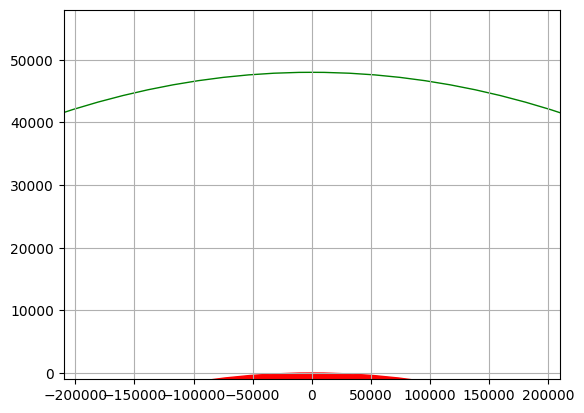

In [ ]:
fig = plt.figure()
ax = plt.axes(xlim=(-210000, 210000), ylim=(-1000, H + 10000))
ax.grid()
circle1 = plt.Circle((0, -R), R, color = 'r', fill = True)
ax = plt.gca()
ax.add_patch(circle1)
circle1 = plt.Circle((0, -R), R + H, color = 'g', fill = False)
ax.add_patch(circle1)
plt.show()

<ipython-input-13-d4f7fda8cd03>:14: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(np.array([x_ship[i], y_ship[i]]))


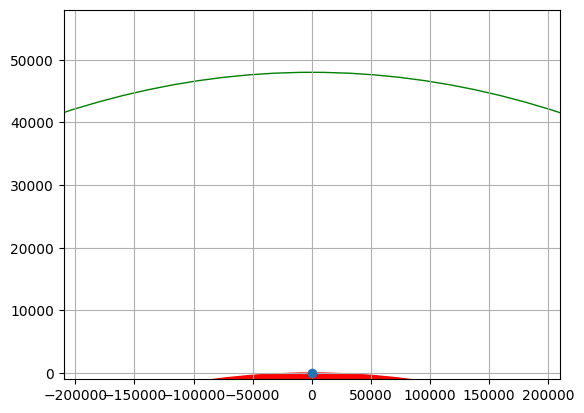

In [ ]:

fig = plt.figure()
ax = plt.axes(xlim = (-210000, 210000), ylim = (-1000, H + 10000))
ax.grid()
circle1 = plt.Circle((0, -R), R, color='r', fill = True)
ax = plt.gca()
ax.add_patch(circle1)
circle1 = plt.Circle((0, -R), R + H, color = 'g', fill = False)
ax.add_patch(circle1)
point, = ax.plot([x_ship[0]], [y_ship[0]], 'o')
def init():
    point.set_data([], [])
    return point,
def animate(i):
    point.set_data(np.array([x_ship[i], y_ship[i]]))
    return point,
anim = FuncAnimation(fig, animate, init_func=init,frames=len(x_ship), interval=20, blit=True)
anim.save("ship.mp4")